In [2]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

## Читаем файлы 

In [3]:
customers =pd.read_csv("~/First_project_files_ecommerce/olist_customers_dataset.csv")

In [4]:
orders = pd.read_csv("~/First_project_files_ecommerce/olist_orders_dataset.csv", 
                     parse_dates=['order_purchase_timestamp',
                                  'order_approved_at',
                                  'order_delivered_carrier_date',
                                  'order_delivered_customer_date',
                                  'order_estimated_delivery_date'])

In [5]:
order_items = pd.read_csv("~/First_project_files_ecommerce/olist_order_items_dataset.csv", 
                         parse_dates=['shipping_limit_date'])

In [6]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [67]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Text(0.5, 0, 'Количество пропусков в orders')

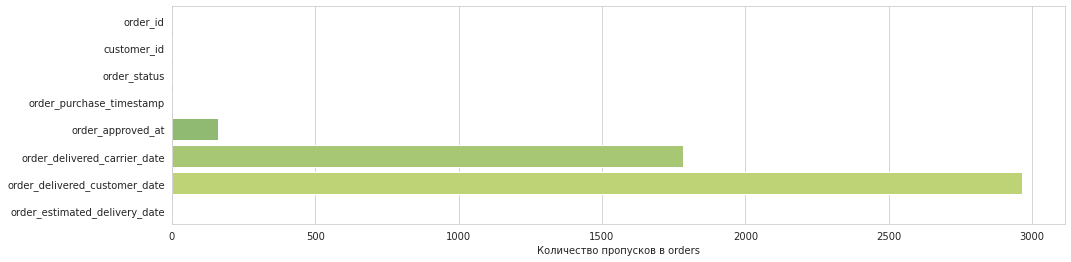

In [9]:
plt.figure(figsize=(16,4))
sns.set_style(style='whitegrid')
sns.barplot(y=orders.isnull().sum().index,x=orders.isnull().sum(), palette='summer')
plt.xlabel('Количество пропусков в orders')

In [10]:
for col in orders.columns:
    un_n = orders[col].dropna().nunique()
    print(f'Количество уникальных {col}: {un_n}')

Количество уникальных order_id: 99441
Количество уникальных customer_id: 99441
Количество уникальных order_status: 8
Количество уникальных order_purchase_timestamp: 98875
Количество уникальных order_approved_at: 90733
Количество уникальных order_delivered_carrier_date: 81018
Количество уникальных order_delivered_customer_date: 95664
Количество уникальных order_estimated_delivery_date: 459


#### Если дропнуть пропуски, то останутся только два статуса

In [23]:
orders.dropna().nunique()

order_id                         96461
customer_id                      96461
order_status                         2
order_purchase_timestamp         95939
order_approved_at                88272
order_delivered_carrier_date     80100
order_delivered_customer_date    95649
order_estimated_delivery_date      445
dtype: int64

In [24]:
orders.dropna().order_status.value_counts()                         

delivered    96455
canceled         6
Name: order_status, dtype: int64

#### Разберемся что стало с остальными

created —  создан   
approved —  подтверждён    
invoiced —  выставлен счёт   
processing —  в процессе сборки заказа   
shipped —  отгружен со склада   
delivered —  доставлен пользователю   
unavailable —  недоступен  
canceled —  отменён 

In [144]:
orders[~orders.order_delivered_customer_date.isin(orders.order_delivered_customer_date.dropna())]\
        .order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

#### Посмотрим (последние статусы) в какие месяцы заказ был сделан, но нет даты прыбытия товара покупателю

In [64]:
x = orders[orders.order_delivered_customer_date.isna()]\
            .set_index('order_purchase_timestamp').to_period("M")

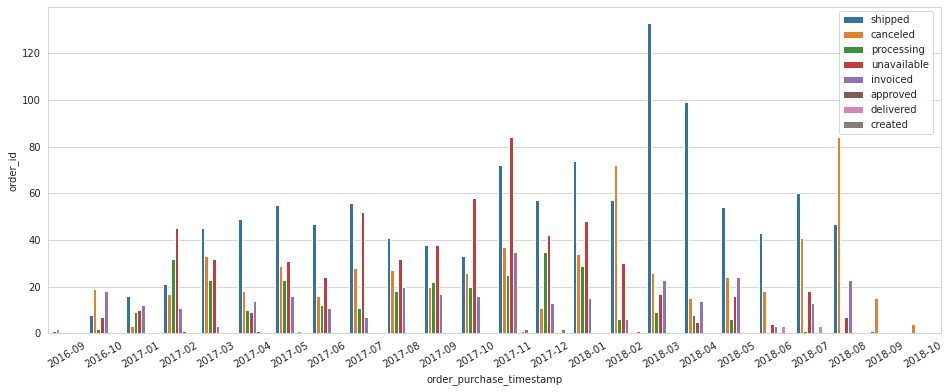

In [66]:
y = x.groupby(['order_purchase_timestamp','order_status']) \
        .agg({'order_id':'count'}) \
        .reset_index() \
        .sort_values(by=['order_purchase_timestamp','order_id'])

plt.figure(figsize=(16,6))
plt.xticks(rotation='30')
sns.set_style(style='whitegrid')
sns.barplot( data=y,   x = 'order_purchase_timestamp',
                y = 'order_id', hue='order_status')
plt.legend(loc='center left', bbox_to_anchor=(0.88, 0.8), ncol=1)

created —  создан   
approved —  подтверждён    
invoiced —  выставлен счёт   
processing —  в процессе сборки заказа   
shipped —  отгружен со склада   
delivered —  доставлен пользователю   
unavailable —  недоступен  
canceled —  отменён 

### Посмотрим на order_items

In [148]:
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [149]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Кол-во пустых значений в order_items

In [150]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

#### Кол-во уникальных значений в order_items

In [7]:
for col in order_items.columns:
    un_n = order_items[col].nunique()
    print(f'Кол-во уникальных {col}: {un_n}')

Кол-во уникальных order_id: 98666
Кол-во уникальных order_item_id: 21
Кол-во уникальных product_id: 32951
Кол-во уникальных seller_id: 3095
Кол-во уникальных shipping_limit_date: 93318
Кол-во уникальных price: 5968
Кол-во уникальных freight_value: 6999


### Будем считать покупкой:
* #### статутсы не отменён  "order_status != canceled" 
* #### c датой доставки "order_delivered_customer_date"
* #### и с заполненой датой оплаты "order_approved_at"

    Для подсчета покупок возьмем уникальный customers.customer_unique_id и далее по обычному customers.customer_id найдем 
    все заказы в orders со статусом != canceled и ~order_approved_at.isna(), ~order_delivered_customer_date.isna()

In [69]:
delivered = orders[(orders.order_status != 'canceled') & 
       (~orders.order_approved_at.isna()) &
       (~orders.order_delivered_customer_date.isna())]
delivered.nunique()

order_id                         96456
customer_id                      96456
order_status                         1
order_purchase_timestamp         95934
order_approved_at                88267
order_delivered_carrier_date     80094
order_delivered_customer_date    95644
order_estimated_delivery_date      445
dtype: int64

### Посмотрим как распределились наши покупки  на графике по дням

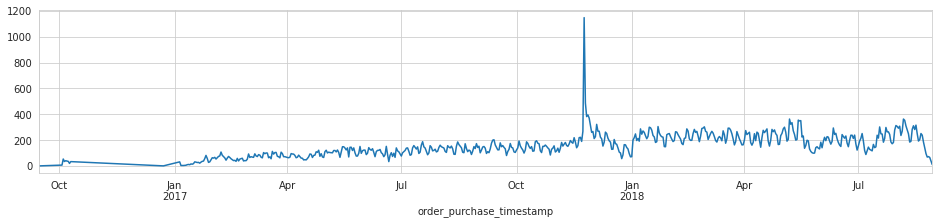

In [64]:
# поиск аномалий
plt.figure(figsize=(16,3))
plt.grid()

anomaly_plot = delivered.set_index('order_purchase_timestamp')\
    .to_period('D').groupby('order_purchase_timestamp').order_id.nunique()
anomaly_plot.plot.line()

####  На 2017-11-24 выпадает аномально большое количество покупок.

In [1076]:
#аномалия  
anomaly = customer_status[(customer_status.order_purchase_timestamp >= '2017-11-24') 
                & (customer_status.order_purchase_timestamp < '2017-11-25')]
anomaly.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
28,e0eea8f69a457b3f1fa246e44c9ebefd,4d221875624017bc47b4d1ce7314a5b7,29311,cachoeiro de itapemirim,ES,3a6d41a4fe7a8e841b7c8e4b77d4e301,delivered,2017-11-24 11:29:52,2017-11-24 13:33:05,2017-11-27 21:12:51,2017-12-06 22:37:09,2017-12-18
147,7f2357cfd99c900565e6ffd6d2708d9d,466c3a741a952640c1984a48ebbffbf9,22251,rio de janeiro,RJ,f72289715f4416fb6e9a289031977b6d,delivered,2017-11-24 22:57:06,2017-11-25 01:57:33,2017-11-30 22:32:03,2017-12-08 21:29:11,2017-12-19
306,8a3083e3f5500b50d6f4f3003604df87,ad1ba362b0121447945a47fe07fef188,37950,sao sebastiao do paraiso,MG,d1a22a39de10a881fa47a509a1a9073b,delivered,2017-11-24 17:16:46,2017-11-24 20:53:47,2017-11-27 16:15:46,2017-12-06 22:48:41,2017-12-15


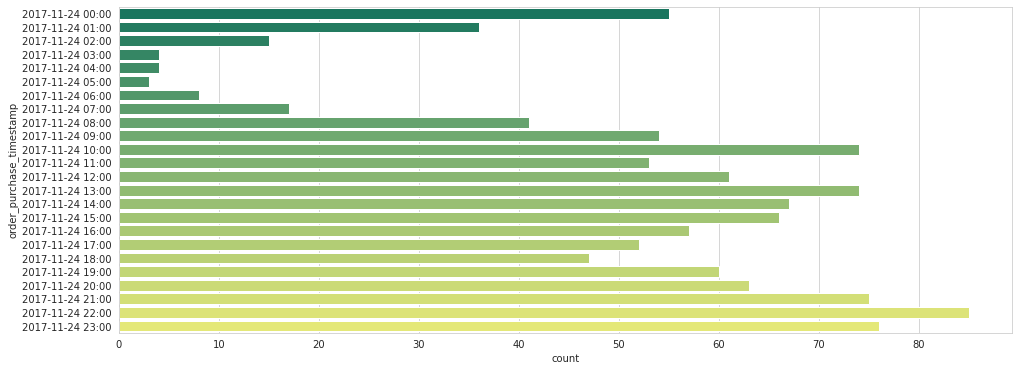

In [1081]:
#Покупок по часам
plt.figure(figsize=(16,6))
x = anomaly.set_index('order_purchase_timestamp').to_period('h').order_id.reset_index()
sns.countplot(y =x.order_purchase_timestamp.sort_values(), palette='summer')

In [26]:
#anomaly.nunique()

#### Вывод: 
       1147 Заказов и 1132 уникальных покупателя за день, все со статусом "Доставлено".
       На 2017-11-24 выпадает "черная пятница", так что все в норме.

### Объединим таблицы customers, delivered для удобства

In [70]:
customer_status = pd.merge(customers, delivered, on='customer_id')

In [71]:
customer_status.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13


In [72]:
#нет даты доставки или статус != 'delivered'

In [73]:
not_delivered = orders[
       (orders.order_status != 'delivered') |
       (orders.order_delivered_customer_date.isna())]

In [74]:
customer_status_not_delivered = pd.merge(customers, not_delivered, on='customer_id')

In [75]:
customer_status_not_delivered.count()

customer_id                      2971
customer_unique_id               2971
customer_zip_code_prefix         2971
customer_city                    2971
customer_state                   2971
order_id                         2971
order_status                     2971
order_purchase_timestamp         2971
order_approved_at                2825
order_delivered_carrier_date     1189
order_delivered_customer_date       6
order_estimated_delivery_date    2971
dtype: int64

In [76]:
customer_status_not_delivered.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09
1,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaT,NaT,2018-05-24
2,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaT,2018-02-20


#     

### 1. Сколько у нас пользователей, которые совершили покупку только один раз? 

In [77]:
#customer_status
#добавим колонку Year,Month (время создания заказа)
customer_status['order_created_month'] = customer_status.order_purchase_timestamp.dt.to_period('M')
#добавим колонку день недели (время создания заказа)
customer_status['day_name'] = customer_status.order_purchase_timestamp.dt.day_name()


#customer_status_not_delivered
#добавим колонку Year,Month (время создания заказа)
customer_status_not_delivered['order_created_month'] = customer_status_not_delivered.order_purchase_timestamp.dt.to_period('M')
#добавим колонку день недели (время создания заказа)
customer_status_not_delivered['day_name'] = customer_status_not_delivered.order_purchase_timestamp.dt.day_name()

#### Всего заказов

In [78]:
orders.order_id.nunique()

99441

#### Проверяем кол-во заказов отвечающих требованиям к покупке

In [79]:
delivered.order_id.nunique()

96456

In [80]:
delivered.customer_id.nunique()

96456

* order_id —  уникальный идентификатор заказа (номер чека)
* customer_id —  позаказный идентификатор пользователя   

Выдаются покупателю только на один заказ, так что считать их каждый раз отдельно нет смысла

#### Проверяем количество уникальных покупателей


In [81]:
customer_status.customer_unique_id.nunique()

93337

#### Посмотрим на получившуюся таблицу

In [170]:
customer_status.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_created_month,day_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,Friday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,Saturday


In [82]:
#отбираем уникальных пользователей, считаем customer_id
total_purchases = customer_status.groupby(['customer_unique_id'], as_index=False) \
                            .order_id.nunique() \
                            .sort_values(by='order_id') \
                            .rename(columns={'order_id':'count_unique_delivery'})
total_purchases

,customer_unique_id,count_unique_delivery
0,0000366f3b9a7992bf8c76cfdf3221e2,1
61775,a9411bb77ab13d6e4bf09d0365f0dd7f,1
61774,a9403b325f6e6619eaf3cfe9af0773bd,1
61773,a93ef4ff71d0f83d54ab658ad156cd23,1
61772,a93ded3225b94e83aba36406dda9dd6f,1
...,...,...
36700,6469f99c1f9dfae7733b25662e7f1782,7
73906,ca77025e7201e3b30c44b472ff346268,7
10058,1b6c7548a2a1f9037c1fd3ddfed95f33,7
22774,3e43e6105506432c953e165fb2acf44c,9


#   

### Кол-во пользователей, которые совершили покупку только один раз

In [172]:
total_purchases[(total_purchases.count_unique_delivery == 1)].customer_unique_id.nunique()

90537

('only one purchase =', 90537, 'more then 1 purchase =', 2800)

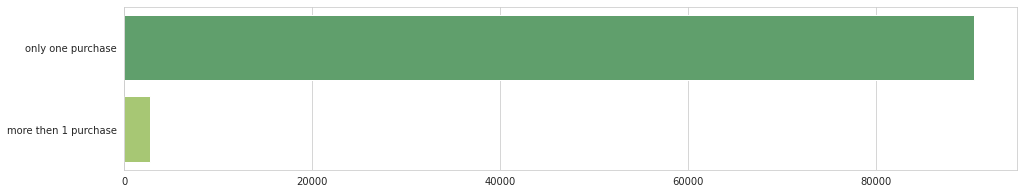

In [173]:
plt.figure(figsize=(16,3))
sns.set_style(style='whitegrid')
ax = sns.barplot(y= ['only one purchase','more then 1 purchase'], 
x= [total_purchases[(total_purchases.count_unique_delivery == 1)].customer_unique_id.nunique(),
    total_purchases[(total_purchases.count_unique_delivery >1)].customer_unique_id.count()], palette='summer')

'only one purchase =', total_purchases[(total_purchases.count_unique_delivery <=1)].customer_unique_id.nunique(),\
'more then 1 purchase =',total_purchases[(total_purchases.count_unique_delivery >1)].customer_unique_id.count()

### Больше одной покупки 

In [174]:
total_purchases[(total_purchases.count_unique_delivery >1)]\
                .groupby('count_unique_delivery', as_index=False)\
                .customer_unique_id.count()

,count_unique_delivery,customer_unique_id
0,2,2572
1,3,181
2,4,28
3,5,9
4,6,5
5,7,3
6,9,1
7,15,1


#   

### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [83]:
#группировка по год и месяц
not_delivered_status =  customer_status_not_delivered\
    .groupby(['order_created_month','order_status'],as_index=False)\
    .agg({'order_id':'count'})

#группировка по месяцам среднее и сумма
not_delivered_plot = pd.merge(
not_delivered_status.groupby('order_status',as_index=False).order_id.mean(),
not_delivered_status.groupby('order_status',as_index=False).order_id.sum(),
on='order_status').rename(columns={'order_id_x':'per month','order_id_y':'all'}).sort_values(by='all',ascending=False)

not_delivered_plot

,order_status,per month,all
6,shipped,48.130435,1107
1,canceled,26.041667,625
7,unavailable,29.000000,609
4,invoiced,14.952381,314
5,processing,15.842105,301
3,delivered,2.000000,8
2,created,1.666667,5
0,approved,1.000000,2


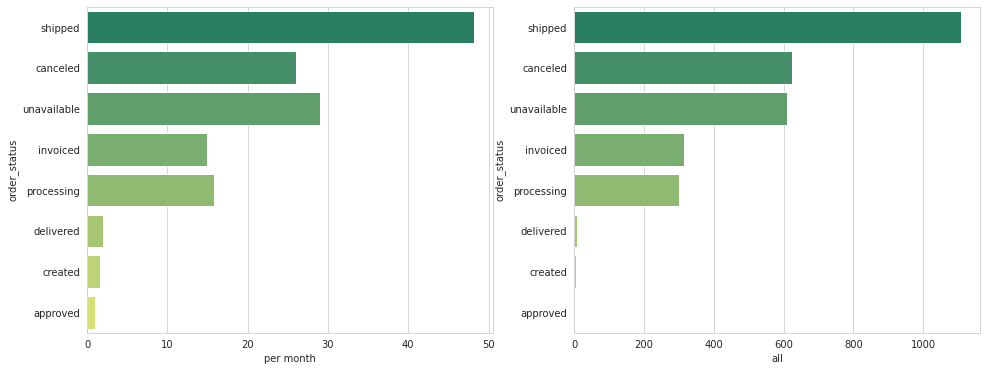

In [176]:
f, ax = plt.subplots(1,2, figsize=(16,6))
sns.set_style(style='whitegrid')
sns.barplot(data= not_delivered_plot, y='order_status' , x='per month', ax= ax[0], palette='summer')
sns.barplot(data= not_delivered_plot, y='order_status' , x='all', ax= ax[1], palette='summer')

created —  создан   
approved —  подтверждён    
invoiced —  выставлен счёт   
processing —  в процессе сборки заказа   
shipped —  отгружен со склада   
delivered —  доставлен пользователю   
unavailable —  недоступен  
canceled —  отменён 

### Вывод: 
    Могие оплаченныe заказы имею статусы != delivered, причины указаны на графике, так же есть заказы со статусом delivered, но без даты доставки
    Возможно ошибка при сборе данных, для более детального анализа недостаточно данных. 

#  

### 3. По каждому товару определим, в какой день недели товар чаще всего покупали.

#### Объединим таблицу items с customer_status

In [84]:
customer_status_and_items = pd.merge(customer_status, order_items, \
         on='order_id')
customer_status_and_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110174 entries, 0 to 110173
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    110174 non-null  object        
 1   customer_unique_id             110174 non-null  object        
 2   customer_zip_code_prefix       110174 non-null  int64         
 3   customer_city                  110174 non-null  object        
 4   customer_state                 110174 non-null  object        
 5   order_id                       110174 non-null  object        
 6   order_status                   110174 non-null  object        
 7   order_purchase_timestamp       110174 non-null  datetime64[ns]
 8   order_approved_at              110174 non-null  datetime64[ns]
 9   order_delivered_carrier_date   110173 non-null  datetime64[ns]
 10  order_delivered_customer_date  110174 non-null  datetime64[ns]
 11  

In [27]:
customer_status_and_items.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_created_month,day_name,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,Tuesday,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,Friday,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48


#### кол-во уник. product_id - ид товара (аналог штрихкода)

In [85]:
customer_status_and_items.product_id.nunique()

32211

####  

In [86]:
#Сгрупируем таблицу #день, айди товара, количество покупок товара 
most_bought = customer_status_and_items.groupby(['day_name','product_id'],as_index=False).order_id.nunique()
most_bought = pd.merge(most_bought, 
most_bought.groupby('product_id',as_index=False).order_id.max(),
on='product_id').rename(columns={'order_id_x':'curr_day','order_id_y':'day_max'})\
    .sort_values(by='curr_day',ascending=False)
#Товары не больше одного раза в день
most_bought_all = most_bought[most_bought.day_max == 1]

In [87]:
most_bought_all.head(3)

,day_name,product_id,curr_day,day_max
45897,Sunday,73dacc49330dc5cc9b1c1983c16200e7,1,1
36269,Monday,d90d7857e8369bf261bcbaeb9731b64e,1,1
36468,Monday,dcea90efda71f06e7a5eafd530c7ff8c,1,1


#### Для товаров которые покупали больше одного раза в день найдем день недели с самым большим количеством продаж этого товара в среднем

In [88]:
most_bought = most_bought[most_bought.curr_day > 1]\
    .groupby(['product_id','day_name'],as_index=False)\
    .agg({'curr_day':'sum'})\
    .groupby('product_id',as_index=False).day_name.max()

In [89]:
most_bought.head(3)

,product_id,day_name
0,00126f27c813603687e6ce486d909d01,Sunday
1,001795ec6f1b187d37335e1c4704762e,Saturday
2,001b72dfd63e9833e8c02742adf472e3,Wednesday


In [90]:
#объединим таблицы
most_bought_total = pd.concat([most_bought_all.groupby('product_id',as_index=False).day_name.max(),
           most_bought])

In [91]:
most_bought_total.head(3)

,product_id,day_name
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday


In [92]:
#проверка, посмотрим количество уникальных product_id в изначальном датафрейме и в нашем
customer_status_and_items.product_id.nunique(), most_bought_total.product_id.nunique()

(32211, 32211)

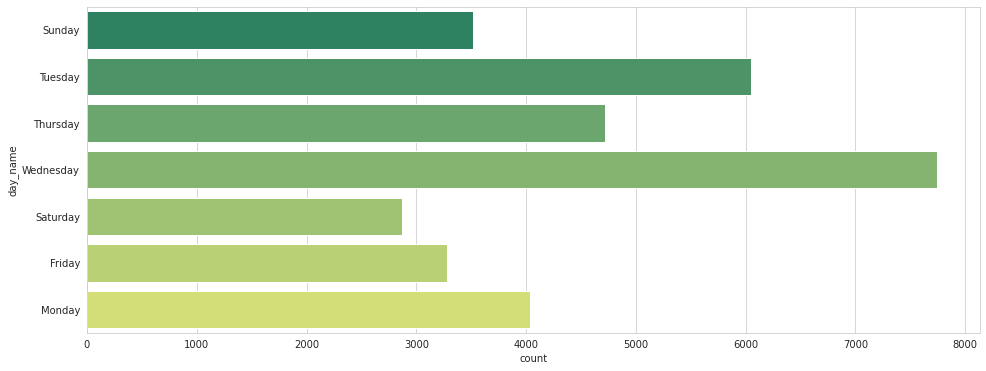

In [93]:
#статистика
plt.figure(figsize=(16,6))
sns.set_style(style='whitegrid')
sns.countplot(y=most_bought_total.day_name, palette='summer')

#   

### 4. Найдем сколько у каждого из пользователей в среднем покупок в неделю (за 7 дней) по месяцам.

In [94]:
df = customer_status

In [95]:
#создадим колонку с количеством дней в месяце
df['days_in_month'] = df.order_purchase_timestamp.dt.days_in_month

In [96]:
df = customer_status[['days_in_month',
                      'customer_unique_id',
                      'order_id',
                      'order_created_month']] \
        .groupby(['days_in_month',
                  'order_created_month',
                  'customer_unique_id']) \
        .agg({'order_id':'nunique'}) \
        .sort_values('order_created_month').reset_index()

In [97]:
#получаем среднее в день * на 7 дней
df['purchase_per_week'] = (df.order_id/df.days_in_month)*7

In [98]:
df.head(3)

,days_in_month,order_created_month,customer_unique_id,order_id,purchase_per_week
0,30,2016-09,830d5b7aaa3b6f1e9ad63703bec97d23,1,0.233333
1,31,2016-10,0032c76b20340da25249092a268ce66c,1,0.225806
2,31,2016-10,a5afc2fc6cbdb37998250ef5c42eab15,1,0.225806


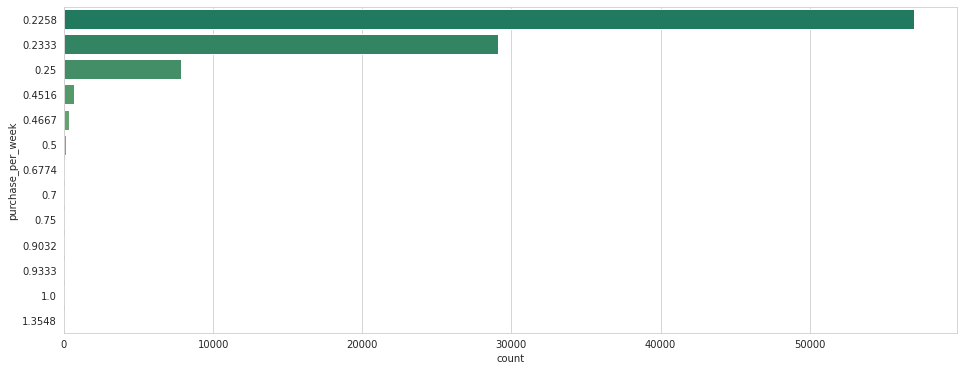

In [115]:
plt.figure(figsize=(16,6))
sns.set_style(style='whitegrid')
sns.countplot(y=round(df.purchase_per_week,4), palette='summer')

#    

### 5. Используя pandas, проведём когортный анализ пользователей. В период с января по декабрь выявим когорту с самым высоким retention на 3й месяц.

In [118]:
#всего покупок по месяцам
customer_status[(customer_status.order_purchase_timestamp >= '2017-01')&
                (customer_status.order_purchase_timestamp < '2018-01')]\
    .set_index('order_purchase_timestamp').to_period("M")\
    .index.value_counts().sort_index()

2017-01     748
2017-02    1641
2017-03    2546
2017-04    2303
2017-05    3545
2017-06    3135
2017-07    3872
2017-08    4193
2017-09    4150
2017-10    4478
2017-11    7288
2017-12    5513
Freq: M, Name: order_purchase_timestamp, dtype: int64

#### Будем считат возвратом повторную покупку не раньше чем через 30 дней после первой

In [123]:
def get_retention(customer_status):
    ret= customer_status\
                .set_index('order_purchase_timestamp')\
                .to_period("d")[['customer_unique_id','order_id']].reset_index()
    #Устанавливаем 30 дневный порог, покупку после которого будем считать как возвращение
    ret_30 = (ret\
            .groupby(['customer_unique_id'])\
            .order_purchase_timestamp.min()\
    +        pd.Timedelta('30 days')).reset_index()
    #Объединим таблицы, переименуем столбцы, установим временные рамки
    ret = pd.merge(ret,
                   ret_30,
                   on='customer_unique_id')
    
    ret.rename(columns={'order_purchase_timestamp_x':'purchase_date',
                        'order_purchase_timestamp_y':'next_purch_limit'},
                           inplace=True)
    #установим временной отрезок 
    ret = ret[(ret.purchase_date >= '2017-01-01')\
              & (ret.purchase_date <= '2017-12-31')]
    #Найдем первую дату покупки
    first_buy = ret.groupby(['purchase_date',
                              'customer_unique_id'], 
                             as_index=False).order_id.min()
    #Найдем вторую дату покупки спустя 30 дней
    #Группируем значения по customer_unique_id и берем первую строчку отсортированную по дате
    second_buy =  ret[ret.purchase_date > ret.next_purch_limit]\
                    .groupby(['customer_unique_id'], 
                    as_index=False)[['customer_unique_id', 'purchase_date']].head(1)
    #Объединим таблицы (так что бы в левой таблице остались все, даже те кто не вернулся), переименуем столбцы
    ret = pd.merge(first_buy,second_buy, how='left', on='customer_unique_id')
    ret.rename(columns={'purchase_date_x':'first_purchase_date',
                        'purchase_date_y':'second_purchase_date'},inplace=True)
    #Найдем дельту между нашими датами
    delta =pd.to_timedelta(\
                            ret.groupby('customer_unique_id',as_index=False)\
                            .second_purchase_date.min()\
                            .second_purchase_date 
                            -
                            ret.groupby('customer_unique_id',as_index=False)\
                            .first_purchase_date.min()\
                            .first_purchase_date
                           ).dt.days
    #Для пользователей которые не вернулись заполним пустые дельты 0
    delta.fillna(0,inplace=True)
    #Уберем все ненужные значения оставив только айди пользователя, дату первой покупки и через сколько дней произошла вторая покупка
    ret = ret.groupby('customer_unique_id',as_index=False).first_purchase_date.min()
    ret['delta'] = delta
    ret['month'] = ret.first_purchase_date.dt.strftime('%Y-%m')
    #поделим дельты на 30 дневные интервалы, целое и будет номером месяца возврата
    ret['N_retention'] = (pd.to_timedelta(ret.delta,unit='d')/ np.timedelta64(1, "M")).astype('int64')
    #сведем таблицу
    reten_tab = ret.pivot_table(values='customer_unique_id', index='month',
                         columns='N_retention', aggfunc=pd.Series.nunique)
     #найдем 100% для каждой когорты, и посчитаем процентное соотношение
    reten_tab[0] = reten_tab.sum(axis=1,skipna=True)
    retention = reten_tab.div(reten_tab[0],axis=0)#.mul(100)
    
    return retention 

In [124]:
#стиль для таблицы
def background_gradient(s, cmap='summer', low=0, high=0.5):
    m=0.001
    M=0.005
    rng = M - m
    norm = colors.Normalize(m - (rng * low), M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

In [125]:
reten_tab = get_retention(customer_status)
reten_tab.style.apply(background_gradient,cmap='summer')\
        .highlight_null('white')\
        .format("{:.2%}", na_rep="")

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  downcast=downcast,


N_retention,0,1,2,3,4,5,6,7,8,9,10
month,,,,,,,,,,,
2017-01,100.00%,0.28%,,0.28%,0.14%,0.14%,0.28%,0.28%,,0.14%,0.42%
2017-02,100.00%,0.12%,0.19%,0.31%,0.25%,0.12%,0.25%,0.12%,0.06%,0.25%,
2017-03,100.00%,0.28%,0.52%,0.36%,0.12%,0.12%,0.32%,0.24%,0.20%,0.04%,
2017-04,100.00%,0.35%,0.27%,0.04%,0.31%,0.35%,0.22%,0.40%,0.13%,,
2017-05,100.00%,0.41%,0.29%,0.17%,0.38%,0.29%,0.35%,,,,
2017-06,100.00%,0.40%,0.43%,0.30%,0.13%,0.53%,0.13%,,,,
2017-07,100.00%,0.35%,0.24%,0.21%,0.32%,0.08%,,,,,
2017-08,100.00%,0.62%,0.27%,0.35%,0.12%,,,,,,
2017-09,100.00%,0.50%,0.45%,0.10%,,,,,,,


Text(0.5, 0, 'Cohort registration month of 2017')

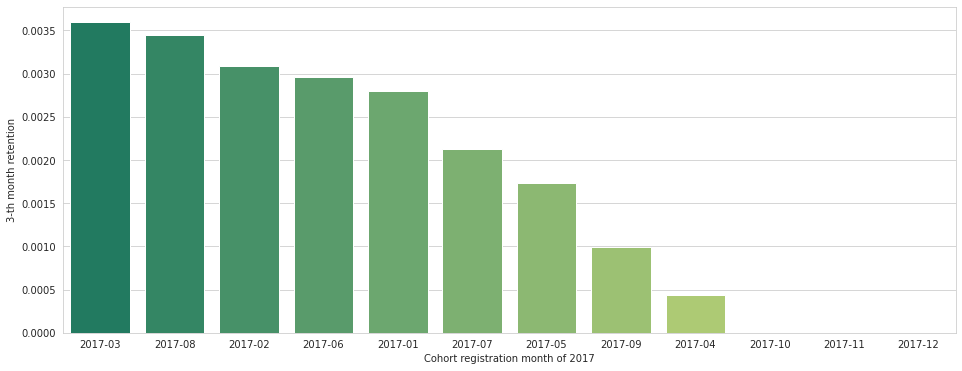

In [133]:
x = reten_tab[3].sort_values(ascending=False)
plt.figure(figsize=(16,6))
sns.set_style(style='whitegrid')
sns.barplot(x=x.index, y= x, palette='summer')
            
plt.ylabel('3-th month retention')
plt.xlabel('Cohort registration month of 2017')

### Вывод: 
    Наибольшее значение удержания на 3-й месяц у когорты зарегистрировавшихся в 2017-03

#   

# RFM

### 6 Часто для качественного анализа аудитории использую подходы, основанные на сегментации. 
    Используя python, построим RFM-сегментацию пользователей.  
    Так как повторных заказов мало, будем считать за все время.
    Для кластеризации выберем следующие метрики:    
    
    R - время от последней покупки пользователя до текущей даты,     
    F - суммарное количество покупок у пользователя за всё время,    
    M - сумма покупок за всё время.     
    

In [13]:
customer_status.order_status.value_counts()

delivered    96456
Name: order_status, dtype: int64

### Подготовим данные 

In [144]:
last_date = customer_status_and_items['order_purchase_timestamp'].max() + pd.to_timedelta('1 day')
last_date

Timestamp('2018-08-30 15:00:37')

In [143]:
rfm = customer_status_and_items.groupby('customer_unique_id', as_index=False) \
                          .agg({'order_purchase_timestamp'    : lambda x: (last_date - x.max()).days,
                                'customer_id'    : 'count' , 
                                'price': 'sum'})

rfm.rename(columns={'order_purchase_timestamp'  : 'recency', 
                    'customer_id'    : 'frequency', 
                    'price': 'monetary'}, inplace=True)

In [145]:
rfm.head(3)

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.9
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.9
2,0000f46a3911fa3c0805444483337064,537,1,69.0


#### Поделим наши данные по квартилям на 4 группы:

RFM -  4 = хророшо, 1 = плохо 
* recency (давность последней покупки)
* frequency (частота)
* monetary (как много тратит в месяц)

In [146]:
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.25, .50, .75, 1]).to_dict()
quintiles

{'recency': {0.25: 114.0, 0.5: 219.0, 0.75: 346.0, 1.0: 714.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0, 1.0: 24.0},
 'monetary': {0.25: 47.65, 0.5: 89.7, 0.75: 154.70000000000002, 1.0: 13440.0}}

In [147]:
def r_score(x):
    if x <= quintiles['recency'][.25]:
        return 4
    elif x <= quintiles['recency'][.5]:
        return 3
    elif x <= quintiles['recency'][.75]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.25]:
        return 1
    elif x <= quintiles[c][.5]:
        return 2
    elif x <= quintiles[c][.75]:
        return 3
    else:
        return 4 

In [148]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [149]:
rfm['RFM_score'] = rfm.R.map(str) + rfm.F.map(str) + rfm.M.map(str)

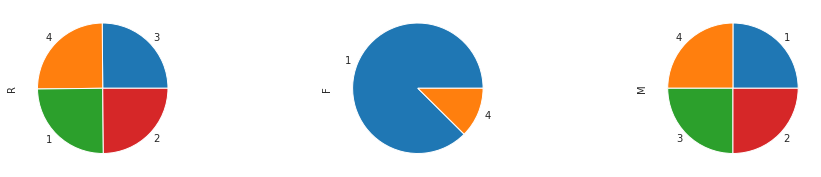

In [150]:
f, ax=plt.subplots(1,3,figsize=(16, 3))
rfm.R.value_counts().plot.pie(ax=ax[0])
rfm.F.value_counts().plot.pie(ax=ax[1])
rfm.M.value_counts().plot.pie(ax=ax[2])

#### Так как повторных покупок слишком мало, frequency 1 - нет повторных покупок и 4 - есть повторные покупки

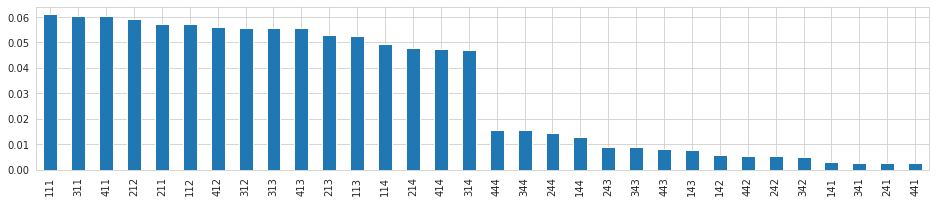

In [151]:
plt.figure(figsize=(16, 3))
rfm.RFM_score.value_counts(normalize=True).plot.bar()

In [164]:
#rfm.describe()
#rfm[rfm.M == 4]

### Пример RFM сегментов:

        RFM 111 (recency=1, frequency=1, monetary=1) имеет границы метрик recency от 346 до 714 дней,
        frequency 1 заказ за все веремя, monetary до 47.65 у.е. за все время.
        
        RFM 444 (recency=4, frequency=4, monetary=4) имеет границы метрик recency не позже 114 дней назад,
        frequency больше 1-го заказа за все веремя, monetary от 154.7 у.е. за все время.